In [1]:
import os
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

from torch.nn import init

In [2]:
heart = pd.read_csv('./heart.csv')

__About this dataset__

1. Age : Age of the patient

2. Sex : Sex of the patient

3. cp : Chest Pain type chest pain type

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain 비심장성 통증: 이런 경우, 흉통은 분명히 존재하지만, 심장에 이상이 없다고 판명이 날 때, 비심장성 흉통이라고 한다.
- Value 3: asymptomatic

4. trtbps : resting blood pressure (in mm Hg)

5. chol : cholestoral in mg/dl fetched via BMI sensor

6. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach : maximum heart rate achieved

9. exng: exercise induced angina (1 = yes; 0 = no)

10. oldpeak: Previous peak | ST depression induced by exercise relative to rest

11. slp: Slope | the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)

12. caa: number of major vessels (0-3)

13. thall: Thal rate (0-3) 

fixed defect - 고정 관류 결손 

reversible defect - 가역적인 관류 결손

target : 
- 0 = less chance of heart attack 
- 1 = more chance of heart attack

http://rstudio-pubs-static.s3.amazonaws.com/24341_184a58191486470cab97acdbbfe78ed5.html

### 데이터 분석

In [3]:
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


<AxesSubplot:ylabel='Frequency'>

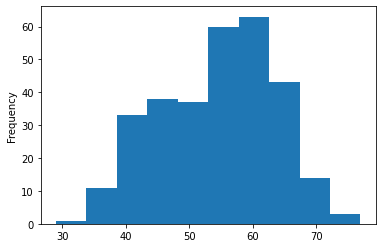

In [4]:
heart['age'].plot(kind='hist') # 나이

In [5]:
print(heart['sex'].value_counts()) # 성별

1    207
0     96
Name: sex, dtype: int64


In [6]:
print(heart['cp'].value_counts()) # 흉통 정도

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


<AxesSubplot:ylabel='Frequency'>

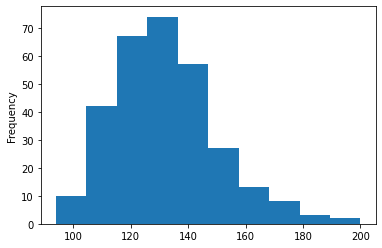

In [7]:
heart['trtbps'].plot(kind='hist') # 휴식기 혈압

<AxesSubplot:ylabel='Frequency'>

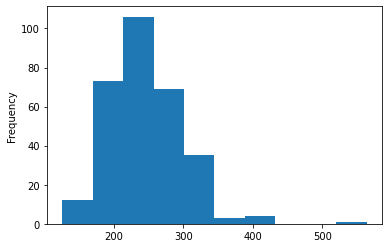

In [8]:
heart['chol'].plot(kind='hist') # 콜레스테롤

In [9]:
print(heart['fbs'].value_counts()) # 공복 혈당 수치 >120 over => 1

0    258
1     45
Name: fbs, dtype: int64


In [10]:
print(heart['thall'].value_counts()) # Thallium Test 결과 -> 운동부하 심전도 테스트

2    166
3    117
1     18
0      2
Name: thall, dtype: int64


In [11]:
print(heart['thall'].value_counts()) # fixed defect - 고정 관류 결손 reversible defect - 가역적인 관류 결손

2    166
3    117
1     18
0      2
Name: thall, dtype: int64


In [12]:
print(heart['restecg'].value_counts()) # 심전도 0: 정상 1 : ST-T 분절 2 : 좌심실 비대

1    152
0    147
2      4
Name: restecg, dtype: int64


<AxesSubplot:ylabel='Frequency'>

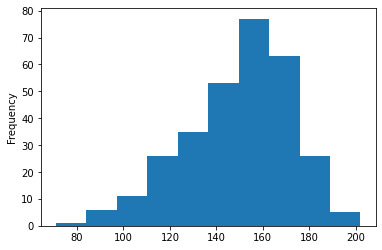

In [13]:
heart['thalachh'].plot(kind='hist') # 최대 심장 박동수 도달 횟수

In [14]:
print(heart['exng'].value_counts()) # 협심증을 유발하는 운동 여부

0    204
1     99
Name: exng, dtype: int64


<AxesSubplot:ylabel='Frequency'>

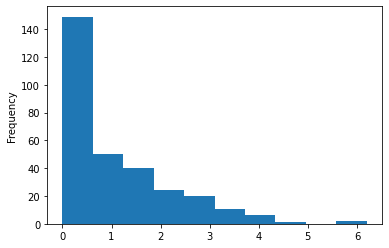

In [15]:
heart['oldpeak'].plot(kind='hist')

In [16]:
print(heart['slp'].value_counts()) # 운동 후 ST segment의 최대치의 움직임 (0 = upsloping; 1 = flat; 2 = downsloping)

2    142
1    140
0     21
Name: slp, dtype: int64


In [17]:
print(heart['caa'].value_counts())  # 심장의 주요 혈관 개수 number of major vessels

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64


In [18]:
print(heart['output'].value_counts()) # 1: 발생가능 고위험군 0: 문제 없음

1    165
0    138
Name: output, dtype: int64


데이터는 0과 1로 나누는 binary_classification이다.

-> Decision Tree, Random Forest, Logistic Regression, DNN을 사용해 볼 수 있겠다.

## 1. 데이터 전처리 X

with sci-kit learn machine learning classifier

In [19]:
heart_data = heart.iloc[:,:-1] # 데이터
heart_label = heart.iloc[:,-1] # 라벨

In [20]:
from sklearn.model_selection import train_test_split
# 학습, 테스트 데이터 분리
train_X, test_X, train_Y, test_Y = train_test_split(heart_data, heart_label, test_size=0.3, random_state=15000) 

In [21]:
## 구현
class mymodel(nn.Module): 
    def __init__(self, is_train=True):        
        super(mymodel, self).__init__()
        ################################
        # 간단한 DNN모델 작성 
        self.l1 = nn.Sequential(
            torch.nn.Linear(13, 32),
            nn.ReLU(True),
            torch.nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Dropout(0.2),
            torch.nn.Linear(64, 32),
            nn.ReLU(True),
            torch.nn.Linear(32, 16),
            nn.ReLU(True),
            torch.nn.Linear(16, 1))
        ################################
                        
    def forward(self, x):        
        ################################
        x = self.l1(x)
        x = torch.sigmoid(x) # 최종 결과 값이 0 ~ 1 사이 값이 되도록 하기 위해 sigmoid activation 함수 사용.
        # 기본 값: softmax로 추정
        ################################        
        return x

my_model = mymodel() # 모델 생성

In [22]:
def print_network(model): # driver
    # 모델 모양 출력
    def _get_network_description(network): # workhorse
        '''Get the string and total parameters of the network'''
        if isinstance(network, nn.DataParallel):
            network = network.module
        s = str(network)
        n = sum(map(lambda x: x.numel(), network.parameters()))
        return s, n
    s, n = _get_network_description(model)
    if isinstance(model, nn.DataParallel):
        net_struc_str = '{} - {}'.format(model.__class__.__name__, model.module.__class__.__name__)
    else: net_struc_str = '{}'.format(model.__class__.__name__)
    log = 'Network structure: {}, with parameters: {:,d}'.format(net_struc_str, n)
    return log, s


log, architecture = print_network(my_model)
print(log)
print(architecture)

Network structure: mymodel, with parameters: 5,185
mymodel(
  (l1): Sequential(
    (0): Linear(in_features=13, out_features=32, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Dropout(p=0.2, inplace=False)
    (5): Linear(in_features=64, out_features=32, bias=True)
    (6): ReLU(inplace=True)
    (7): Linear(in_features=32, out_features=16, bias=True)
    (8): ReLU(inplace=True)
    (9): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [23]:
def train(model, train_data, train_label,test_data, test_label, epochs = 100):
    # 학습 진행
    running_loss = 0.0 # 손실 함수 값.
    criterion = nn.BCELoss() # 손실함수 -> Binary Cross Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001) # Optimizer로 Adam을 사용. Learning rate = 0.001
    for epoch in range(epochs): # 학습 횟수동안 학습을 반복
        total = 0; # 정확도 확인용 전체 데이터 개수
        correct = 0; # 예측과 일치하는 데이터 개수
        for index, data in enumerate(train_data.values): # 데이터 1개씩 학습 진행.
            # 데이터가 학습 모델에 들어갈 수 있는 Tensor로 변환 모양은 -> Tensor [13]
            data = torch.from_numpy(data) 
            # 손실 계산이 가능하도록 라벨 역시 Tensor로 변환 모양은 T-ensor -> [1]
            label = torch.Tensor([float(train_label.values[index])]) 
            data = data.float() # float형으로 강제 변환
            optimizer.zero_grad() # 학습을 위해 grad값 초기화
            output = model(data) # 모델에 데이터를 넣어서 예측(Forward Propagation)
            loss = criterion(output, label) # 예측과 실제를 비교해서 손실값 계산
            loss.backward() # 오차 역전파(Back Propagation)
            optimizer.step() # 다음 step 진행
            running_loss += loss.item() # 현재 손실값 추가 => 학습 당 손실 값 출력을 위함
            pred = [0. if output < 0.5 else 1.] # 확률 반올림을 통해 판단
            total = total + 1 # 전체 데이터 개수 세기
            if(pred[0] == label[0]): # 예측 데이터와 실제 데이터 일치하는 경우
                correct = correct + 1 # 정답 + 1
        print("epoch {0}: 정확도:{1:.4}, 손실:{2:.6}".format(epoch,correct/total, running_loss)) # 정확도와 손실 출력
        running_loss = 0.0
        if epoch > 0 and epoch % 10 == 0:
            test(model,test_data, test_label) # epoch 10번마다 테스트 실행
    print("End Training!")

In [24]:
def test(model,test_data, test_label):
    total = len(test_data) # 테스트 데이터 전체 개수
    correct = 0 # 정답 개수
    with torch.no_grad(): # grad 미실시 -> train이 아니기 때문
        for index, data in enumerate(test_data.values):# 데이터 1개씩 예측 진행.
            # 데이터가 학습 모델에 들어갈 수 있는 Tensor로 변환 모양은 -> Tensor [13]
            data = torch.from_numpy(data) 
            # 라벨 역시 Tensor로 변환 모양은 T-ensor -> [1]
            label = torch.Tensor([float(test_label.values[index])])
            data = data.float() # float형으로 강제 변환
            output = model(data) # 모델에 데이터를 넣어서 예측(Forward Propagation)
            pred = [0. if output < 0.5 else 1.] # 확률 반올림을 통해 판단
            if(pred[0] == label[0]): # 예측 데이터와 실제 데이터 일치하는 경우
                correct = correct + 1 # 정답 + 1
        print("테스트 데이터 정확도:{0:.4}".format(correct/total)) # 정확도 출력

In [25]:
train(my_model,train_X, train_Y,test_X,test_Y)

epoch 0: 정확도:0.5142, 손실:156.338
epoch 1: 정확도:0.6132, 손실:144.238
epoch 2: 정확도:0.6557, 손실:136.3
epoch 3: 정확도:0.6651, 손실:134.063
epoch 4: 정확도:0.7075, 손실:127.877
epoch 5: 정확도:0.7075, 손실:125.428
epoch 6: 정확도:0.7028, 손실:122.03
epoch 7: 정확도:0.7406, 손실:117.862
epoch 8: 정확도:0.7642, 손실:113.667
epoch 9: 정확도:0.75, 손실:116.646
epoch 10: 정확도:0.7972, 손실:108.818
테스트 데이터 정확도:0.6484
epoch 11: 정확도:0.7783, 손실:105.391
epoch 12: 정확도:0.783, 손실:108.154
epoch 13: 정확도:0.8066, 손실:101.261
epoch 14: 정확도:0.8066, 손실:99.3231
epoch 15: 정확도:0.7925, 손실:98.6617
epoch 16: 정확도:0.7925, 손실:96.9722
epoch 17: 정확도:0.816, 손실:97.129
epoch 18: 정확도:0.8255, 손실:96.0009
epoch 19: 정확도:0.8302, 손실:92.337
epoch 20: 정확도:0.816, 손실:92.5272
테스트 데이터 정확도:0.7033
epoch 21: 정확도:0.8113, 손실:89.9134
epoch 22: 정확도:0.8302, 손실:90.325
epoch 23: 정확도:0.8019, 손실:90.2602
epoch 24: 정확도:0.8208, 손실:87.2689
epoch 25: 정확도:0.8396, 손실:85.3861
epoch 26: 정확도:0.816, 손실:86.7794
epoch 27: 정확도:0.8302, 손실:83.0393
epoch 28: 정확도:0.8208, 손실:82.1063
epoch 29: 정확도:0.8302, 손실:81

In [26]:
test(my_model,test_X, test_Y)

테스트 데이터 정확도:0.7253


출처: https://rfriend.tistory.com/257 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

## 2. 데이터 정규화 진행

1. thalachh

2. trtbps

3. chol

에 대해 정규화 진행

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [28]:
# Pandas Series로 뽑으면 데이터가 1차원 데이터가 된다 -> Scaler에 넣기 위해서는 Pandas DataFrame을 만들어야 하는데
# DataFrame 만드는 방법에 Series를 넣어서 만드는 방법이 있네... to_frame...
# 아래 방식은 Pandas Series로 부터 nparray를 추출, 이를 Scaler에 fit & tranform하여 데이터 프레임으로 만들어서
# 기존 DataFrame에 update로 데이터 바꾸는 방식
thalachh = heart['thalachh'].values.reshape(-1,1)
trtbps = heart['trtbps'].values.reshape(-1,1)
chol = heart['chol'].values.reshape(-1,1)

1. MinMaxScaler

In [29]:
mm_norm = MinMaxScaler() # 최소-최대 스케일러

In [30]:
# 스케일러 적용
mm_thalachh = mm_norm.fit_transform(thalachh) 
mm_trtbps = mm_norm.fit_transform(trtbps)
mm_chol = mm_norm.fit_transform(chol)

In [31]:
# 각각의 스케일링 된 데이터를 데이터 프레임으로 만듬.
thalachh = pd.DataFrame(mm_thalachh,columns=['thalachh'])
trtbps = pd.DataFrame(mm_thalachh,columns=['trtbps'])
chol = pd.DataFrame(mm_thalachh,columns=['chol'])

In [32]:
# 기존 데이터에서 deep copy로 dataframe을 복사하여 새 dataframe을 만듬
mm_heart = heart.copy()

In [33]:
mm_heart.head() # 복사 확인

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
 # 3개의 column에 대해 각각 update를 통해 값을 갱신
mm_heart.update(thalachh)
mm_heart.update(trtbps)
mm_heart.update(chol)
mm_heart.head() # 변경 확인.

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,0.603053,0.603053,1,0,0.603053,0,2.3,0,0,1,1
1,37,1,2,0.885496,0.885496,0,1,0.885496,0,3.5,0,0,2,1
2,41,0,1,0.770992,0.770992,0,0,0.770992,0,1.4,2,0,2,1
3,56,1,1,0.816794,0.816794,0,1,0.816794,0,0.8,2,0,2,1
4,57,0,0,0.702290,0.702290,0,1,0.702290,1,0.6,2,0,2,1


In [35]:
mm_heart_data = mm_heart.iloc[:,:-1] # 데이터
mm_heart_label = mm_heart.iloc[:,-1] # 라벨

In [36]:
from sklearn.model_selection import train_test_split
# 학습, 테스트 데이터 분리
mm_train_X, mm_test_X, mm_train_Y, mm_test_Y = train_test_split(mm_heart_data, mm_heart_label, test_size=0.3, random_state=123 ,stratify = mm_heart_label)

In [37]:
mm_model = mymodel() # 모델 생성

In [38]:
train(mm_model,mm_train_X, mm_train_Y,mm_test_X, mm_test_Y) # 모델 학습

epoch 0: 정확도:0.5519, 손실:147.171
epoch 1: 정확도:0.6132, 손실:143.074
epoch 2: 정확도:0.6745, 손실:130.91
epoch 3: 정확도:0.7736, 손실:106.774
epoch 4: 정확도:0.8019, 손실:95.3315
epoch 5: 정확도:0.8113, 손실:91.8787
epoch 6: 정확도:0.8396, 손실:87.5452
epoch 7: 정확도:0.8443, 손실:86.4197
epoch 8: 정확도:0.8349, 손실:84.5154
epoch 9: 정확도:0.8255, 손실:84.9352
epoch 10: 정확도:0.8396, 손실:83.6129
테스트 데이터 정확도:0.7802
epoch 11: 정확도:0.8302, 손실:87.1995
epoch 12: 정확도:0.816, 손실:89.3702
epoch 13: 정확도:0.8208, 손실:86.7962
epoch 14: 정확도:0.8443, 손실:84.7012
epoch 15: 정확도:0.8255, 손실:86.4679
epoch 16: 정확도:0.8396, 손실:84.6137
epoch 17: 정확도:0.8538, 손실:83.333
epoch 18: 정확도:0.8255, 손실:83.7303
epoch 19: 정확도:0.8443, 손실:83.0986
epoch 20: 정확도:0.8491, 손실:80.9036
테스트 데이터 정확도:0.8022
epoch 21: 정확도:0.8538, 손실:79.48
epoch 22: 정확도:0.8491, 손실:82.5426
epoch 23: 정확도:0.8302, 손실:81.8228
epoch 24: 정확도:0.8396, 손실:82.4013
epoch 25: 정확도:0.8349, 손실:82.825
epoch 26: 정확도:0.8255, 손실:84.144
epoch 27: 정확도:0.8443, 손실:79.9906
epoch 28: 정확도:0.8585, 손실:80.7309
epoch 29: 정확도:0.8396, 

In [39]:
test(mm_model,mm_test_X, mm_test_Y) # 모델 테스트

테스트 데이터 정확도:0.7692


2. StandardScaler

In [40]:
# Pandas Series로 뽑으면 데이터가 1차원 데이터가 된다 -> Scaler에 넣기 위해서는 Pandas DataFrame을 만들어야 하는데
# DataFrame 만드는 방법에 Series를 넣어서 만드는 방법이 있네... to_frame...
# 아래 방식은 Pandas Series로 부터 nparray를 추출, 이를 Scaler에 fit & tranform하여 데이터 프레임으로 만들어서
# 기존 DataFrame에 update로 데이터 바꾸는 방식
thalachh = heart['thalachh'].values.reshape(-1,1)
trtbps = heart['trtbps'].values.reshape(-1,1)
chol = heart['chol'].values.reshape(-1,1)

In [41]:
std_norm = StandardScaler() # 정규화 스케일러

In [42]:
# 스케일러 적용
std_thalachh = std_norm.fit_transform(thalachh)
std_trtbps = std_norm.fit_transform(trtbps)
std_chol = std_norm.fit_transform(chol)

In [43]:
# 각각의 스케일링 된 데이터를 데이터 프레임으로 만듬.
thalachh = pd.DataFrame(std_thalachh,columns=['thalachh'])
trtbps = pd.DataFrame(std_trtbps,columns=['trtbps'])
chol = pd.DataFrame(std_chol,columns=['chol'])

In [44]:
# 기존 데이터에서 deep copy로 dataframe을 복사하여 새 dataframe을 만듬
std_heart = heart.copy()

In [45]:
std_heart.head() # 복사 확인

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
 # 3개의 column에 대해 각각 update를 통해 값을 갱신
std_heart.update(thalachh)
std_heart.update(trtbps)
std_heart.update(chol)
std_heart.head() # 변경 확인.

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,0.763956,-0.256334,1,0,0.015443,0,2.3,0,0,1,1
1,37,1,2,-0.092738,0.072199,0,1,1.633471,0,3.5,0,0,2,1
2,41,0,1,-0.092738,-0.816773,0,0,0.977514,0,1.4,2,0,2,1
3,56,1,1,-0.663867,-0.198357,0,1,1.239897,0,0.8,2,0,2,1
4,57,0,0,-0.663867,2.082050,0,1,0.583939,1,0.6,2,0,2,1


In [47]:
std_heart_data = std_heart.iloc[:,:-1] # 데이터
std_heart_label = std_heart.iloc[:,-1] # 라벨

In [48]:
from sklearn.model_selection import train_test_split
# 학습, 테스트 데이터 분리
std_train_X, std_test_X, std_train_Y, std_test_Y = train_test_split(std_heart_data, std_heart_label, test_size=0.3, random_state=123 ,stratify = std_heart_label)

In [49]:
std_model = mymodel() # 모델 생성

In [50]:
train(std_model,std_train_X, std_train_Y,std_test_X, std_test_Y) # 모델 학습

epoch 0: 정확도:0.533, 손실:147.798
epoch 1: 정확도:0.5566, 손실:146.57
epoch 2: 정확도:0.5708, 손실:146.144
epoch 3: 정확도:0.6038, 손실:143.838
epoch 4: 정확도:0.75, 손실:122.25
epoch 5: 정확도:0.8019, 손실:98.2933
epoch 6: 정확도:0.7972, 손실:93.5536
epoch 7: 정확도:0.8019, 손실:93.2858
epoch 8: 정확도:0.7925, 손실:93.536
epoch 9: 정확도:0.7972, 손실:95.2127
epoch 10: 정확도:0.7877, 손실:93.7152
테스트 데이터 정확도:0.7363
epoch 11: 정확도:0.783, 손실:91.3892
epoch 12: 정확도:0.8019, 손실:92.3812
epoch 13: 정확도:0.7783, 손실:99.6596
epoch 14: 정확도:0.7925, 손실:93.381
epoch 15: 정확도:0.816, 손실:85.5608
epoch 16: 정확도:0.816, 손실:83.7269
epoch 17: 정확도:0.8066, 손실:86.8739
epoch 18: 정확도:0.8208, 손실:86.0286
epoch 19: 정확도:0.8443, 손실:80.3063
epoch 20: 정확도:0.8396, 손실:80.7627
테스트 데이터 정확도:0.7692
epoch 21: 정확도:0.8491, 손실:82.293
epoch 22: 정확도:0.8349, 손실:79.8273
epoch 23: 정확도:0.8491, 손실:77.5527
epoch 24: 정확도:0.8255, 손실:81.0402
epoch 25: 정확도:0.8443, 손실:80.5075
epoch 26: 정확도:0.8349, 손실:81.2097
epoch 27: 정확도:0.8113, 손실:83.5036
epoch 28: 정확도:0.8443, 손실:78.1816
epoch 29: 정확도:0.8349, 손실:7

In [51]:
test(std_model,std_test_X, std_test_Y)  # 모델 테스트

테스트 데이터 정확도:0.7912
